<a href="https://colab.research.google.com/github/VMBoehm/ML-Tutorials/blob/master/Classification_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guide to classification with convolutional neural networks on the Fashion Mnist dataset**

Classification with MNIST
    Copyright (C) 2019  Mohammadjavad Vakili <vakili@strw.leidenuniv.nl> (tweaks and comments: Vanessa Boehm)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

https://github.com/zalandoresearch/fashion-mnist/
Let's load the dataset using tensorflow

In [0]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist

In [0]:

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


# Let's look at some of the images:

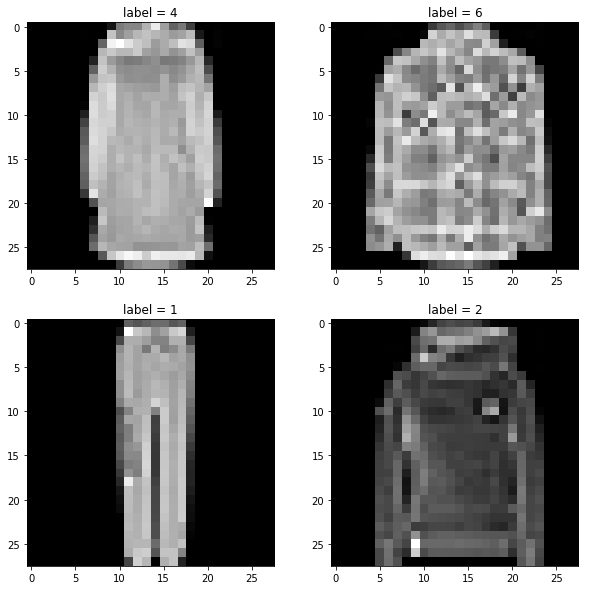

In [0]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
fig = plt.figure(1, figsize=(10,10))
gs = gridspec.GridSpec(2,2)
plt.gray()
plt.grid(False)

indices = [3250, 32, 1000, 54]

cnt = 0
for i in range(2):
    for j in range(2):   
        ax = plt.subplot(gs[i,j])
        ax.imshow(training_images[indices[cnt]])
        ax.set_title("label = "+str(training_labels[indices[cnt]]))
        cnt += 1

# Now we can build a model based on standard fully connected neural nets to learn the mapping between fashion labels and the images 


In [0]:
#simple fully connected network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile and train 
# categorical cross entropy: https://cwiki.apache.org/confluence/display/MXNET/Multi-hot+Sparse+Categorical+Cross-entropy
# available loss functions https://keras.io/losses/
# optimizers: https://arxiv.org/pdf/1609.04747.pdf
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=4)

# inspect the model
model.summary()


W0805 10:30:25.978029 140015027443584 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/4
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4815 - acc: 0.8298
Epoch 2/4
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3633 - acc: 0.8687
Epoch 3/4
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3277 - acc: 0.8801
Epoch 4/4
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3020 - acc: 0.8889
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________

In [0]:
# how does it work on data it has never seen before
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.3370 - acc: 0.8780


In [0]:
#simple fully connected network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile and train, this time with a different optimizer, Stochastic Gradient Descent (list of available optimizers: https://keras.io/optimizers/)
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=4)

# inspect the model
model.summary()

Epoch 1/4
60000/60000 [==============================] - 5s 82us/sample - loss: 0.7200 - acc: 0.7687
Epoch 2/4
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5054 - acc: 0.8286
Epoch 3/4
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4618 - acc: 0.8408
Epoch 4/4
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4380 - acc: 0.8481
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  200960    
_________________________________________________________________
dense_3 (Dense)              multiple                  2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
________________________________________

In [0]:
# Adam is superior to SGD!
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.4722 - acc: 0.8319


In [0]:
#now let's increase the comeplexity of the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=4)

#and we can see that we are already overfitting!
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/4
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4800 - acc: 0.8255
Epoch 2/4
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3607 - acc: 0.8674
Epoch 3/4
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3289 - acc: 0.8783
Epoch 4/4
10000/10000 [==============================] - 1s 73us/sample - loss: 0.3676 - acc: 0.8683


# Can we improve the model with convolutional neural nets?



In order to apply convolutions to the test and training images, we need to reshape the arrays so that the input of the CNN is one data block.

In [0]:
import numpy as np
# we add an axis for the channel (for RGB this would be 3 numbers)
training_images=training_images[:,:,:,np.newaxis]
test_images = test_images[:,:,:,np.newaxis]

In [0]:
training_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
model = tf.keras.models.Sequential([
  # https://keras.io/layers/convolutional/; a convolutional layer is defined by the number of filters -> that's the output depth, the size of the filters, here (3,3), the stride (default=(1,1)) and the padding (default is 'valid'= no padding)
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # max pooling reduces the size by only keeping the maximum of (n,n) pixels
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  # let's everything talk to each other
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=4)
model.summary()


Epoch 1/4
60000/60000 [==============================] - 12s 195us/sample - loss: 0.4615 - acc: 0.8337
Epoch 2/4
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3155 - acc: 0.8841
Epoch 3/4
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2715 - acc: 0.8992
Epoch 4/4
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2414 - acc: 0.9104
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5,

In [0]:
#slight overfitting?
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.2871 - acc: 0.8954


In [0]:
model = tf.keras.models.Sequential([
  # https://keras.io/layers/convolutional/; a convolutional layer is defined by the number of filters -> that's the output depth, the size of the filters, here (3,3), the stride (default=(1,1)) and the padding (default is 'valid'= no padding)
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # max pooling reduces the size by only keeping the maximum of (n,n) pixels
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  # let's everything talk to each other
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=4)
model.summary()

Epoch 1/4
60000/60000 [==============================] - 9s 150us/sample - loss: 0.4926 - acc: 0.8221
Epoch 2/4
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3413 - acc: 0.8764
Epoch 3/4
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2961 - acc: 0.8924
Epoch 4/4
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2666 - acc: 0.9027
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 16)        1040      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 

In [0]:
#possibly less overfitting
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.2849 - acc: 0.8980


# What do convolutions do?

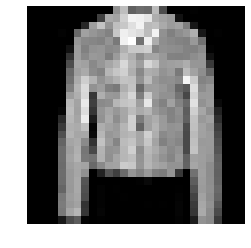

In [0]:
image = test_images[10,:,:,0]

import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image)
plt.show()

In [0]:
image_transformed = np.copy(image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]


Let's experiment with a few convlution kernels

In [0]:
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

In [0]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (image[x - 1, y-1] * filter[0][0])
      convolution = convolution + (image[x, y-1] * filter[0][1])
      convolution = convolution + (image[x + 1, y-1] * filter[0][2])
      convolution = convolution + (image[x-1, y] * filter[1][0])
      convolution = convolution + (image[x, y] * filter[1][1])
      convolution = convolution + (image[x+1, y] * filter[1][2])
      convolution = convolution + (image[x-1, y+1] * filter[2][0])
      convolution = convolution + (image[x, y+1] * filter[2][1])
      convolution = convolution + (image[x+1, y+1] * filter[2][2])
      convolution = convolution
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      image_transformed[x, y] = convolution


(-0.5, 27.5, 27.5, -0.5)

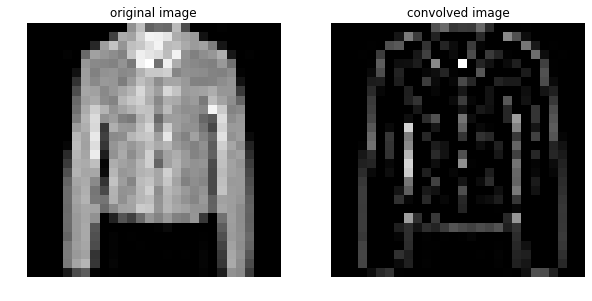

In [0]:
fig = plt.figure(1, figsize=(10,10))
gs = gridspec.GridSpec(1,2)
plt.gray()
plt.grid(False)
ax = plt.subplot(gs[0,0])
ax.imshow(image)
ax.axis('off')
ax.set_title("original image")
ax = plt.subplot(gs[0,1])
ax.imshow(image_transformed)
ax.set_title("convolved image")
ax.axis('off')